# Establishing an Indian Restaurant in Canberra

## Introduction/Business Problem:

### The aim of this report is to detail prospective locations for establishing a new Indian themed restaurant. While all restaurants are different, this solution is intended to be for a restaurant without an established clientele (so not a franchise or famous chef etc.). It isn't so exclusive that people seek it out. It doesn't have huge amounts of money to put into advertising. It is your average, small family run restaurant trying to make a start. Without these advantages, the location of the restaurant is extremely important.

### Starting a restaurant is tricky. You need to hire good staff and keep them happy, source great produce, pay your bills, manage your clientele. Importantly, you also need to set up your restaurant in an area that gets you an adequate supply of diners.

### For this analysis, we will be analysing the Australian city of Canberra. We will note the locations of all existing restaurants in Canberra that are documented in Foursquare. We will also identify other Indian themed restaurants. The ideal location will de determined as a function of distance from other restaurants, where close is an advantage as there is existing foot traffic in the area, but being far from other Indian themed restaurants, and therefore without competition from similar existing, established restaurants.


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm

#!conda install -c conda-forge geopy --yes -MAYBE!
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes -MAYBE
import folium # plotting library
import math

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### The address list establishes a series of locations around Canberra which will be the centre of the Foursquare search

In [2]:
address_list = ['25 Namadgi Circuit, Palmerston ACT 2913','20 Challinor Cres Florey ACT 2615','39 London Circuit Canberra ACT 2601','11 Stapylton St Holder ACT 2611','51 Leahy Cl Narrabundah ACT 2604','38 Ebenezer St, Bonython ACT 2905']

In [3]:
CLIENT_ID = 'YXTR4QT5NMR5XJLFBVAG5P1VWHBIYCJ2JGJ3FO0BLXYD1WPI' # your Foursquare ID
CLIENT_SECRET = '5XUJBF4UEFS5KIVTY2HXNKJ0AMFWKGOONKWD211VVKH5L2BC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500

In [4]:
search_query = 'Restaurant'
radius = 10000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [5]:
name = []
id = []
lat = []
long = []
shortname = []
Restaurant_of_choice = 'INDIAN' #needs to be upper case

### The step below runs the geocode script. Sometimes it times out and therefore the cell will need to be re-run

In [6]:
i = 0 #this is to print df1 once.
for address in address_list:
    try:
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print(latitude, longitude)
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        url
        results = requests.get(url).json()
        df1 = pd.DataFrame.from_dict(results)
    except:
        print('\nGeolocator timed out. Please re-run this cell.')
    if(i == 0):
        #print(df1['response']['venues'])
        i+=1
    for i in df1['response']['venues']:
    #print('Name: ',i['name'],', Lat: ',i['location']['lat'], ' Long: ', i['location']['lng'])
        if(i['name'] not in name):
            name.append(i['name'])
            id.append(i['id'])
            lat.append(i['location']['lat'])
            long.append(i['location']['lng'])
            try:
            #    print(i['categories'][0]['shortName'])
                shortname.append(i['categories'][0]['shortName'])
            except:
            #    print('No shortname given')
                shortname.append('Nan')

        #print('\n\n')
print('\nDone')

-35.198156 149.1170588
-35.2316894 149.0535682
-35.2830816 149.1258713
-35.3389271 149.0459279
-35.3437386 149.1413769
-35.433029 149.0814705

Done


### This step takes time. It questions the Foursquare API for the likes of each of the restaurants.

In [7]:
likes = []
j = 0
print('id is {} units long. Please wait'.format(len(id)))
for i,Lat,Long in zip(id,lat,long):
    
    url2 = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i,CLIENT_ID, CLIENT_SECRET, VERSION)
    url2

    #url3 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},&v={}'.format(CLIENT_ID, CLIENT_SECRET, Lat, Long, VERSION)
    #url3
    
    results2 = requests.get(url2).json()
    #results3 = requests.get(url3).json()
    
    df2 = pd.DataFrame.from_dict(results2) #this is to find out how many people like the restaurant
    #df3 = pd.DataFrame.from_dict(results3) #this is to see how many things are near the restaurant
    
    likes.append(df2['response']['likes']['count'])
    #if(j < 4):
        #print(df2)
        #print(df2['response']['likes'])
        #print(df3)
        #print('\n')
        #print(df3['meta']['errorDetail'])
        #print('\n')
        #print(df3['meta']['requestId'])
        
    j += 1
    print(j,' complete')

id is 107 units long. Please wait
1  complete
2  complete
3  complete
4  complete
5  complete
6  complete
7  complete
8  complete
9  complete
10  complete
11  complete
12  complete
13  complete
14  complete
15  complete
16  complete
17  complete
18  complete
19  complete
20  complete
21  complete
22  complete
23  complete
24  complete
25  complete
26  complete
27  complete
28  complete
29  complete
30  complete
31  complete
32  complete
33  complete
34  complete
35  complete
36  complete
37  complete
38  complete
39  complete
40  complete
41  complete
42  complete
43  complete
44  complete
45  complete
46  complete
47  complete
48  complete
49  complete
50  complete
51  complete
52  complete
53  complete
54  complete
55  complete
56  complete
57  complete
58  complete
59  complete
60  complete
61  complete
62  complete
63  complete
64  complete
65  complete
66  complete
67  complete
68  complete
69  complete
70  complete
71  complete
72  complete
73  complete
74  complete
75  complete


### The steps below generate a map of all the restaurants in the Canberra area. Indian Restaurants (or restaurants with the word 'Indian' in the name) are highlighted in red, whilei all other restaurants are blue.

In [8]:
Map_lat = -35.3082
Map_long = 149.1244

venues_map = folium.Map(location=[Map_lat, Map_long], zoom_start=11)

In [9]:
for Name, Lat, Long, Shortname in zip(name,lat,long,shortname):
    #print(Shortname.upper(),'is different to',Restaurant_of_choice)
    if(Restaurant_of_choice in Shortname.upper()):
        folium.features.CircleMarker(
            [Lat, Long],
            radius=5,
            color='red',
            fill = True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(venues_map)
        #print('Found one')
        #print('Name is: ', Name,'at lat: ',Lat,'and long: ',Long)
    else:
        folium.features.CircleMarker(
            [Lat, Long],
            radius=5,
            color='blue',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
        #print('Nope')
        

In [10]:
venues_map

In [11]:
Map_lat = -35.3082
Map_long = 149.1244

venues_map2 = folium.Map(location=[Map_lat, Map_long], zoom_start=11)

### This second map shows the same information but the size of the markers is based on the number of likes. The more the restaurant is liked the bigger the marker.

In [12]:
for Name, Likes, Lat, Long, Shortname in zip(name,likes,lat,long,shortname):
    #print(Shortname.upper(),'is different to',Restaurant_of_choice)
    if(Restaurant_of_choice in Shortname.upper()):
        folium.features.CircleMarker(
            [Lat, Long],
            radius=Likes,
            color='red',
            fill = True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(venues_map2)
        #print('Found one')
        #print('Name is: ', Name,'at lat: ',Lat,'and long: ',Long)
    else:
        folium.features.CircleMarker(
            [Lat, Long],
            radius=Likes,
            color='blue',
            fill = True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map2)
        #print('Nope')

In [13]:
venues_map2

# Distance work

### Below is a function I have written to determine the distance in meters between two points. It is used to create a distance matrix which is used for DBSCAN.

In [14]:
r = 6378100 #radius of the earth

In [15]:
def distance(Lat1, Lat2, Long1, Long2):
    pi = math.pi
    Lat1 = Lat1/180*pi
    Lat2 = Lat2/180*pi
    Long1 = Long1/180*pi
    Long2 = Long2/180*pi
    
    inBracket1 = (Lat2 - Lat1)/2
    Term1 = math.sin(inBracket1)
    Term1 = math.pow(Term1,2)
    
    inBracket2 = (Long2 - Long1)/2
    Term2 = math.sin(inBracket2)
    Term2 = math.pow(Term2,2)
    
    Term2 = math.cos(Lat1)*math.cos(Lat2)*Term2
    
    inBracket = math.sqrt(Term1+Term2)
    #print(inBracket)
    
    d = 2*r*math.asin(inBracket)
    return d
    #inBrackets = math.sqrt( x )

In [16]:
#a = lat[59]
#b = long[59]
close = []

### The cell below uses the function 'distance' to determine the distance to all other restaurants in the area. If it is less than 2000m it adds the restaurant to the 'close' list.

In [17]:
for a,b in zip(lat,long):
    count = 0
    for Lat,Long in zip(lat,long):
    
        if(distance(a,Lat,b,Long) < 2000): #this distance is meters
            #print('found one')
            count += 1
    close.append(count -1 )
#print(close)

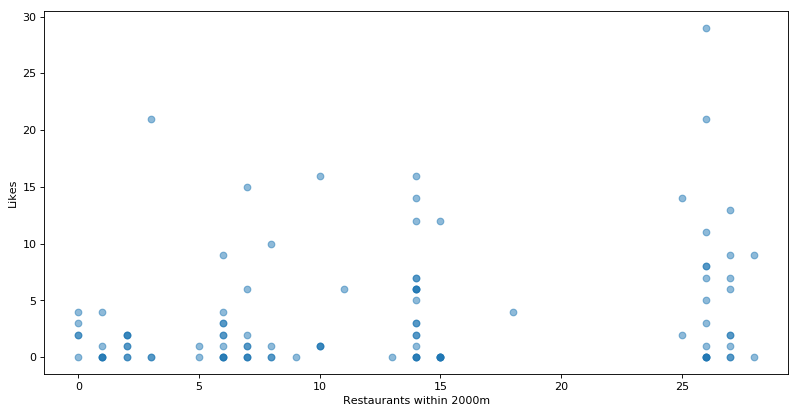

In [18]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(close, likes,alpha=0.5)
plt.xlabel("Restaurants within 2000m")
plt.ylabel("Likes")
plt.show()

### This analysis shows that restaurants receive more likes if they are near lots of other restaurants. Locating your restaurant away from any competition seems to lead to lower likes, probably due to the much lower traffic in the area.

# DBSCAN work

In [19]:
DistanceMatrix = np.zeros((len(id),len(id)))

### The code below creates a distance matrix of the distance between each of the restaurants.

In [20]:
for i in range(len(id)):
    for j in range(len(id)):
        #def distance(Lat1, Lat2, Long1, Long2):
        seperation = distance(lat[i],lat[j],long[i],long[j])
        DistanceMatrix[i,j] = seperation

In [21]:
epsilon = 500
minimumSamples = 3
db = DBSCAN(eps=epsilon, min_samples=minimumSamples, metric = 'precomputed').fit(DistanceMatrix)
labels = db.labels_

In [22]:
clusters = labels.tolist()


In [23]:
AvailColors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred','darkblue','darkgreen','cadetblue','darkpurple','pink','lightblue','lightgreen','black']

In [37]:
Map_lat = -35.3082
Map_long = 149.1244

venues_map3 = folium.Map(location=[Map_lat, Map_long], zoom_start=11.5)

In [38]:
for Name, Likes, Lat, Long, Shortname, Cluster in zip(name,likes,lat,long,shortname, clusters):
    #print(Shortname.upper(),'is different to',Restaurant_of_choice)
    if(Cluster == -1):
        folium.features.CircleMarker(
            [Lat, Long],
            radius=Likes,
            color='gray',
            fill = True,
            fill_color='gray',
            fill_opacity=0.6
        ).add_to(venues_map3)
        #print('Found one')
        #print('Name is: ', Name,'at lat: ',Lat,'and long: ',Long)
    elif(Cluster > len(AvailColors) - 1):
        folium.features.CircleMarker(
            [Lat, Long],
            radius=Likes,
            color=AvailColors[Cluster - len(AvailColors)],
            fill = True,
            fill_color=AvailColors[Cluster - len(AvailColors)],
            fill_opacity=0.6
        ).add_to(venues_map3)
    
    else:
        folium.features.CircleMarker(
            [Lat, Long],
            radius=Likes,
            color=AvailColors[Cluster],
            fill = True,
            fill_color=AvailColors[Cluster],
            fill_opacity=0.6
        ).add_to(venues_map3)
        #print('Nope')

In [39]:
venues_map3

### The map above combines colours for the clusters and  size for the number of likes

In [27]:
#name,likes,lat,long,shortname, clusters
compiled = {'Name':name,'Likes':likes,'Cluster':clusters}

In [28]:
Compiled = pd.DataFrame(compiled)
NumberOfLabels = max(labels) + 2 #this accounts for cluster label 0 and -1.

In [29]:
ClusterDataframe = Compiled[Compiled['Cluster']==-1]

In [31]:
ForPlot = {'ToDelete':[0]}
dfForPlot = pd.DataFrame(ForPlot)
dfForPlot.head()
Names = []

In [32]:
for i in range(-1,max(labels) + 1):
    ClusterDataframe = Compiled[Compiled['Cluster']==i]
    toAdd = ClusterDataframe.loc[:,'Likes'].tolist()
    Name = "Cluster " + str(i)
    Names.append(str(i))
    df1 = {Name:toAdd}
    df1Dataframe = pd.DataFrame(df1)
    dfForPlot = pd.concat([dfForPlot,df1Dataframe], axis=1)

In [33]:
dfForPlot = dfForPlot.drop(['ToDelete'], axis=1)


In [34]:
for i in range(-1,max(labels) + 1):
    ClusterDataframe = Compiled[Compiled['Cluster']==i]
    toAdd = ClusterDataframe.loc[:,'Likes'].tolist()
    Name = "Cluster " + str(i)
    Names.append(str(i))
    df1 = {Name:toAdd}
    df1Dataframe = pd.DataFrame(df1)
    dfForPlot = pd.concat([dfForPlot,df1Dataframe], axis=1)

In [35]:
ClusterDataframe = Compiled[Compiled['Cluster']==-1]
ClusterSingle = ClusterDataframe.loc[:,'Likes'].tolist()
#print(ClusterSingle)

ClusterDataframe = Compiled[Compiled['Cluster']==0]
Cluster0 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster0)

ClusterDataframe = Compiled[Compiled['Cluster']==1]
Cluster1 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster1)

ClusterDataframe = Compiled[Compiled['Cluster']==2]
Cluster2 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster2)

ClusterDataframe = Compiled[Compiled['Cluster']==3]
Cluster3 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster3)

ClusterDataframe = Compiled[Compiled['Cluster']==4]
Cluster4 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster4)

ClusterDataframe = Compiled[Compiled['Cluster']==5]
Cluster5 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster5)

ClusterDataframe = Compiled[Compiled['Cluster']==6]
Cluster6 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster6)

ClusterDataframe = Compiled[Compiled['Cluster']==7]
Cluster7 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster7)

ClusterDataframe = Compiled[Compiled['Cluster']==8]
Cluster8 = ClusterDataframe.loc[:,'Likes'].tolist()
#print(Cluster8)

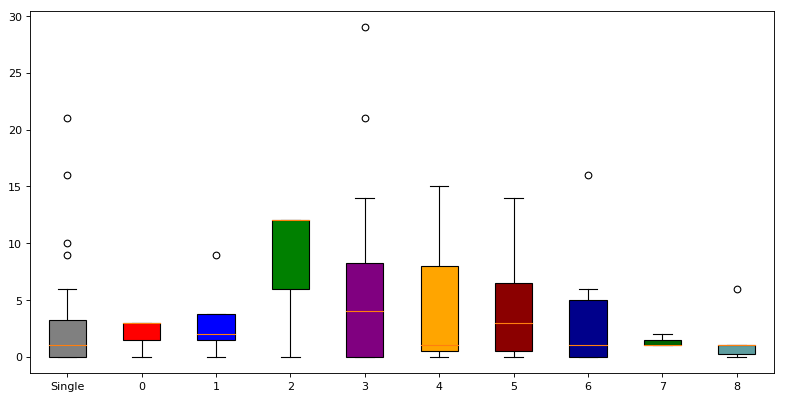

In [36]:
plt.figure(figsize=(12, 6), dpi=80)
box_plot_data=[ClusterSingle,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8]
box=plt.boxplot(box_plot_data,patch_artist=True,labels=['Single','0','1','2','3','4','5','6','7','8'])
#AvailColors

colors = ['gray','red', 'blue', 'green', 'purple', 'orange', 'darkred','darkblue','darkgreen','cadetblue']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

### The chart above is a box chart which details the variations between clusters.

# Summary

### Location appears to have some effect on the avareage number of likes for a restaurant. The region to the South East of the Canberra Centre named Kingston appears to have the highest average likes, followed by the Canberra Centre restaurants and the North West Restaurants. Establishing a restaurant away from a cluster of restaurants doesn't appear to be impossible, as a number of restaurants in the 'Single' column are performing very well. 

## Recommendation

### Based purely on location data and likes, I would recommend a business planning on setting up a restaurant should consider the South East cluster of restaurants in the Kingston area as a strong potential location.